# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
tf.__version__

'2.1.0'

Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

**Q3**.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
x_train_tran = x_train/255

In [0]:
x_test_tran = x_test/255

In [0]:
y_train_tran = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_tran = tf.keras.utils.to_categorical(y_test, num_classes=10)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization())

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  12        
_________________________________________________________________
conv2d (Conv2D)              multiple                  896       
_________________________________________________________________
batch_normalization_1 (Batch multiple                  128       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_2 (Batch multiple                  256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [17]:
#Train the model
model.fit(x_train_tran,y_train_tran,          
          validation_data=(x_test_tran,y_test_tran),
          epochs=10,
          batch_size=32)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 236s 5ms/sample - loss: 1.6319 - accuracy: 0.4184 - val_loss: 1.1834 - val_accuracy: 0.5802
Epoch 2/10
50000/50000 [==============================] - 236s 5ms/sample - loss: 1.2709 - accuracy: 0.5451 - val_loss: 1.1358 - val_accuracy: 0.6066
Epoch 3/10
50000/50000 [==============================] - 236s 5ms/sample - loss: 1.1272 - accuracy: 0.6010 - val_loss: 1.0014 - val_accuracy: 0.6561
Epoch 4/10
50000/50000 [==============================] - 233s 5ms/sample - loss: 1.0124 - accuracy: 0.6415 - val_loss: 0.9699 - val_accuracy: 0.6723
Epoch 5/10
50000/50000 [==============================] - 236s 5ms/sample - loss: 0.9123 - accuracy: 0.6812 - val_loss: 0.9395 - val_accuracy: 0.6792
Epoch 6/10
50000/50000 [==============================] - 234s 5ms/sample - loss: 0.8209 - accuracy: 0.7083 - val_loss: 0.9340 - val_accuracy: 0.6944
Epoch 7/10
50000/50000 [==========================

Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [18]:
#Load VGG Model
vgg = tf.keras.applications.vgg16.VGG16(include_top=True, #Should we include classification Layers
                                        weights='imagenet', #Load imagenet weights, 'None' will load random weights
                                        input_shape=(224,224,3)) #Input image size

553467904/553467096 [==============================] - 16s 0us/step


Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
image_path1 = "/content/drive/My Drive/49438170746_8378201627_c.jpg"
image_path1


'/content/drive/My Drive/49438170746_8378201627_c.jpg'

In [0]:
#Load and resize this image
img = tf.keras.preprocessing.image.load_img(image_path1)
load_img = img.resize((600,400))

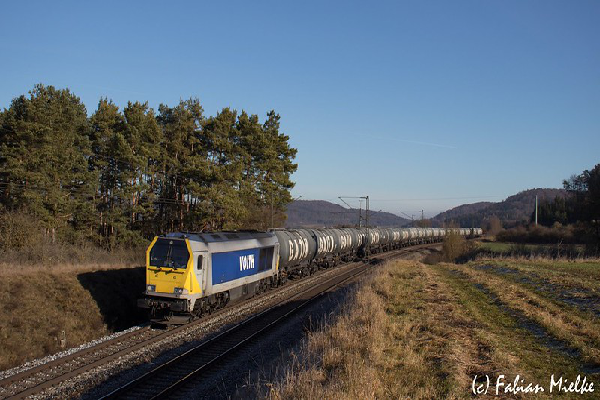

In [45]:
load_img

In [0]:
import numpy as np


Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [47]:
#Prepare Input 
#VGG takes 224x224 image
model_input = load_img.resize((224,224))
model_input = tf.keras.preprocessing.image.img_to_array(model_input)

#Image array should be normalized in same way as was done for VGG training
model_input = tf.keras.applications.vgg16.preprocess_input(model_input)

#Add a dimension to input data to make it a 4D input as required by model
model_input = np.expand_dims(model_input, axis=0)
model_input.shape

(1, 224, 224, 3)

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [48]:
#Predict
prediction = vgg.predict(model_input)
prediction.shape

(1, 1000)

In [49]:
#Prediction Class
np.argmax(prediction[0])

565

In [50]:
tf.keras.applications.vgg16.decode_predictions(prediction)

[[('n03393912', 'freight_car', 0.29296556),
  ('n03160309', 'dam', 0.15731585),
  ('n04467665', 'trailer_truck', 0.10562231),
  ('n03272562', 'electric_locomotive', 0.10198074),
  ('n03496892', 'harvester', 0.09259754)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
import pandas as pd
from pandas import read_csv

In [0]:
tweets = read_csv('/content/drive/My Drive/tweets.csv',encoding = 'unicode_escape')

In [122]:
tweets.shape

(9093, 3)

**Drop null values**

*   Drop all the rows with null values




In [123]:
tweets.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [0]:
tweets_df = tweets.dropna()

**Print the dataframe**
*   print initial 5 rows of the data


In [125]:
tweets_df.shape

(3291, 3)

In [126]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re
tweets_df = tweets_df.applymap(lambda s: s.lower())
tweets_df = tweets_df.applymap(lambda s: re.sub('[^0-9a-z #+_]','',s))


tweets_df = tweets_df.applymap(lambda s: s.strip())


## Question 3

In [128]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,negative emotion
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,positive emotion
2,swonderlin can not wait for #ipad 2 also they ...,ipad,positive emotion
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,negative emotion
4,sxtxstate great stuff on fri #sxsw marissa may...,google,positive emotion


**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





##Question 4

In [129]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion                      2672
negative emotion                       519
no emotion toward brand or product      91
i cant tell                              9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [0]:
tweets_df = tweets_df[(tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='positive emotion') | (tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']=='negative emotion')]

In [133]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

positive emotion    2672
negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
tweets_df['is_there_an_emotion_directed_at_a_brand_or_product'] = tweets_df.is_there_an_emotion_directed_at_a_brand_or_product.map({'positive emotion':1,'negative emotion':0})

In [135]:
tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 i have a 3g iphone after 3 hrs tweeti...,iphone,0
1,jessedee know about fludapp awesome ipadiphon...,ipad or iphone app,1
2,swonderlin can not wait for #ipad 2 also they ...,ipad,1
3,sxsw i hope this years festival isnt as crashy...,ipad or iphone app,0
4,sxtxstate great stuff on fri #sxsw marissa may...,google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
feature = tweets_df['tweet_text']
label = tweets_df['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature,label,test_size=.25,random_state=2)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
train_x_dtm = vect.fit_transform(train_x)
test_x_dtm = vect.transform(test_x)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()


### Fit the classifer
- fit logistic regression classifier

In [144]:
lgr.fit(train_x_dtm, train_y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
from sklearn.naive_bayes import MultinomialNB
# use Naive Bayes to predict the star rating
nb = MultinomialNB()


### Fit the classifer
- fit naive bayes classifier

In [146]:
nb.fit(train_x_dtm, train_y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
from sklearn import metrics
%matplotlib inline
y_pred_class_lgr = lgr.predict(test_x_dtm)


### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_class_nb = nb.predict(test_x_dtm)



## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [154]:

# calculate accuracy
print (metrics.accuracy_score(test_y, y_pred_class_lgr))

0.8734335839598998


### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [156]:
# calculate accuracy
print (metrics.accuracy_score(test_y, y_pred_class_nb))

0.8609022556390977
